In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [200]:
#Importowanie wartości wszystkich walut przez rok poprzedzający pandemie

data_1=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-03-01/2019-05-30/')
data_2=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-06-01/2019-08-31/')
data_3=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-09-01/2019-11-30/')
data_4=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2019-12-01/2020-02-29/')

frames = [data_1, data_2, data_3, data_4]
bp_df = pd.concat(frames)

#Importowanie wartości wszystkich walut przez rok pandemi

data_1=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-03-01/2020-05-30/')
data_2=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-06-01/2020-08-31/')
data_3=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-09-01/2020-11-30/')
data_4=pd.read_json('http://api.nbp.pl/api/exchangerates/tables/a/2020-12-01/2021-02-28/')

frames = [data_1, data_2, data_3, data_4]
d_df = pd.concat(frames)

In [201]:
# Połączenie zagnieżdzonej tabeli w jedną
def marge_nested_column(col):
    frames = []

    for i, item in enumerate(col):
        frames.append(pd.DataFrame.from_dict(col.iloc[i], orient='columns'))

    return pd.concat(frames)

bp_df = marge_nested_column(bp_df['rates'])
d_df = marge_nested_column(d_df['rates'])

In [202]:
# Obliczenie średniej wartości dla każdej waluty

bp_df = bp_df.groupby('code').mean().reset_index()
d_df = d_df.groupby('code').mean().reset_index()

In [203]:
# Oznaczenie które waluty są dla krajów wysokorozwiniętych

def target_dev_countries(df):
    currencies = ['NOK', 'AUD', 'CHF', 'EUR', 'DKK', 'SGD', 'ISK', 'CAD', 'USD', 'HKD', 'NZD', 'SEK', 'GBP', 'JPY', 'KRW', 'ILS', 'CZK','CLP','HUF','HRK','RUB','RON']
    df['dev_countries'] = np.where(df['code'].isin(currencies), 1, 0)
    return True

target_dev_countries(bp_df)
target_dev_countries(d_df)

True

In [236]:
def plot_filter(dev_countries, mid_value):

    plot1 = {'currencies' : bp_df['code'].loc[(bp_df['dev_countries'] == dev_countries) &  (bp_df['mid'] > mid_value)],
         'before_pandemic' : bp_df['mid'].loc[(bp_df['dev_countries'] == dev_countries) &  (bp_df['mid'] > mid_value)],
         'during_pandemic' : d_df['mid'].loc[(d_df['dev_countries'] == dev_countries) &  (bp_df['mid'] > mid_value)]}

    plot2 = {'currencies' : bp_df['code'].loc[(bp_df['dev_countries'] == dev_countries) &  (bp_df['mid'] < mid_value)],
         'before_pandemic' : bp_df['mid'].loc[(bp_df['dev_countries'] == dev_countries) &  (bp_df['mid'] < mid_value)],
         'during_pandemic' : d_df['mid'].loc[(d_df['dev_countries'] == dev_countries) &  (bp_df['mid'] < mid_value)]}

    for i in [plot1, plot2]:
        df = pd.DataFrame(i)
        df.plot('currencies',y=['before_pandemic','during_pandemic'], kind='bar')
        plt.ylabel("PLN")
        plt.title(f"For dev_countries = {dev_countries} and mid_value > or < is {mid_value}")
        plt.show()

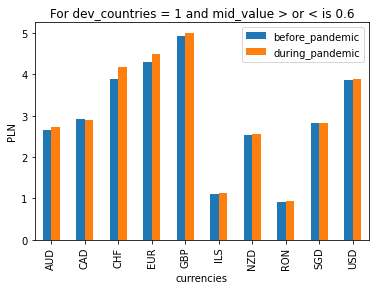

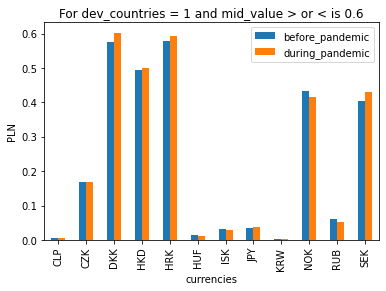

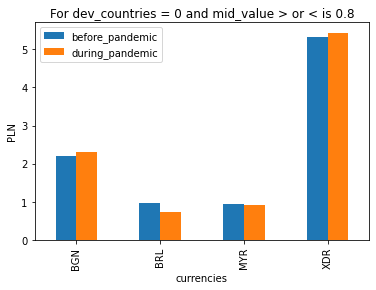

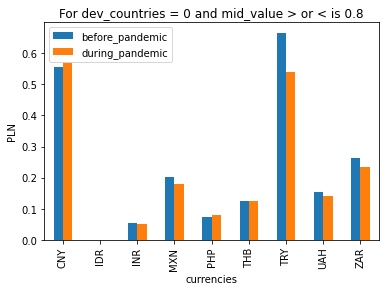

In [237]:
plot_filter(dev_countries=1, mid_value=.6)
plot_filter(dev_countries=0, mid_value=.8)